In [54]:
import pandas as pd

df = pd.read_csv('meta_march.csv')
df = df.rename(columns={'Unnamed: 0': 'Hero'})
df

,Hero,Stat,"Arakni, Huntsman","Azalea, Ace in the Hole","Betsy, Skin in the Game","Bravo, Showstopper",Dash I/O,"Dash, Inventor Extraordinaire",Dorinthea Ironsong,"Fai, Rising Rebellion",...,"Olympia, Prized Fighter","Prism, Awakener of Sol","Rhinar, Reckless Rampage","Riptide, Lurker of the Deep","Ser Boltyn, Breaker of Dawn","Teklovossen, Esteemed Magnate","Uzuri, Switchblade","Victor Goldmane, High and Mighty","Viserai, Rune Blood","Vynnset, Iron Maiden"
0,"Arakni, Huntsman",Games,108,435,131,252,190,130,417,179,...,188,349,401,148,342,145,254,576,231,247
1,"Arakni, Huntsman",Games going first,54,225,40,119,82,63,252,113,...,113,182,213,93,176,59,140,313,100,95
2,"Arakni, Huntsman",Games going second,54,210,91,133,108,67,165,66,...,75,167,188,55,166,86,114,263,131,152
3,"Arakni, Huntsman",Wins,54,207,73,90,103,67,159,76,...,114,124,202,60,153,64,127,172,75,122
4,"Arakni, Huntsman",Wins going first,28,111,22,41,49,39,92,45,...,69,64,107,34,69,27,69,86,30,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,"Vynnset, Iron Maiden",Games going first,152,265,96,114,92,80,328,141,...,152,245,210,89,203,72,228,388,133,79
140,"Vynnset, Iron Maiden",Games going second,95,194,92,105,93,51,196,52,...,75,195,170,52,223,60,131,277,133,79
141,"Vynnset, Iron Maiden",Wins,125,181,92,88,90,42,189,90,...,120,245,205,58,233,81,184,227,110,79
142,"Vynnset, Iron Maiden",Wins going first,74,105,53,49,49,28,126,75,...,77,136,125,36,100,44,123,151,63,39


In [55]:
import pandas as pd
import numpy as np

# Assuming df is already defined and loaded
def keep_top_n_percentage_heroes(df, n=10.0):
    # Step 1: Sum the values of each column to get the total games for each hero
    total_games = df.sum(axis=0)
    
    # Step 2: Find the (100-n)th percentile value to identify the threshold for the top n%
    threshold = np.percentile(total_games, 100-n)
    
    # Step 3: Create a mask for heroes in the top n% based on total games
    top_n_mask = total_games >= threshold
    
    # Step 4: Filter the DataFrame to keep only the top n% heroes in rows and columns
    filtered_df = df.loc[top_n_mask.index[top_n_mask], top_n_mask.index[top_n_mask]]
    
    return filtered_df

# Filter out rows for wins and games, and set 'Hero' as index
wins_df = df[df['Stat'] == 'Wins'].set_index('Hero').drop(columns=['Stat'])
games_df = df[df['Stat'] == 'Games'].set_index('Hero').drop(columns=['Stat'])


# Filter the win_percent_df to keep only the top n% heroes as both rows and columns
top_heroes_df = keep_top_n_percentage_heroes(games_df, n=100)

# Calculate win percentage DataFrame
win_percent_df = wins_df / games_df
# win_percent_df.loc['Azalea, Ace in the Hole', 'Victor Goldmane, High and Mighty'] = 0.38

win_percent_df

,"Arakni, Huntsman","Azalea, Ace in the Hole","Betsy, Skin in the Game","Bravo, Showstopper",Dash I/O,"Dash, Inventor Extraordinaire",Dorinthea Ironsong,"Fai, Rising Rebellion","Kano, Dracai of Aether",Kassai of the Golden Sand,...,"Olympia, Prized Fighter","Prism, Awakener of Sol","Rhinar, Reckless Rampage","Riptide, Lurker of the Deep","Ser Boltyn, Breaker of Dawn","Teklovossen, Esteemed Magnate","Uzuri, Switchblade","Victor Goldmane, High and Mighty","Viserai, Rune Blood","Vynnset, Iron Maiden"
Hero,,,,,,,,,,,,,,,,,,,,,
"Arakni, Huntsman",0.500000,0.475862,0.557252,0.357143,0.542105,0.515385,0.381295,0.424581,0.444828,0.350230,...,0.606383,0.355301,0.503741,0.405405,0.447368,0.441379,0.500000,0.298611,0.324675,0.493927
"Azalea, Ace in the Hole",0.524138,0.500000,0.522267,0.405363,0.667774,0.562500,0.479136,0.612805,0.537217,0.574701,...,0.662577,0.384951,0.590909,0.548000,0.555556,0.726496,0.485861,0.331333,0.643116,0.605664
"Betsy, Skin in the Game",0.442748,0.477733,0.500000,0.364341,0.451852,0.291139,0.284091,0.377778,0.446701,0.174419,...,0.382812,0.394231,0.380165,0.385417,0.337209,0.424242,0.310924,0.328814,0.435374,0.510638
"Bravo, Showstopper",0.642857,0.594637,0.635659,0.500000,0.531100,0.400000,0.419441,0.594982,0.459364,0.326807,...,0.475000,0.535655,0.518304,0.647059,0.421875,0.433333,0.409186,0.487212,0.501818,0.598174
Dash I/O,0.457895,0.332226,0.548148,0.468900,0.500000,0.418367,0.344689,0.401274,0.629310,0.415254,...,0.531250,0.579365,0.535211,0.449275,0.452381,0.589474,0.474026,0.303279,0.446494,0.513514
"Dash, Inventor Extraordinaire",0.484615,0.437500,0.708861,0.600000,0.581633,0.500000,0.444695,0.534722,0.580311,0.472000,...,0.661017,0.631229,0.523179,0.475610,0.464883,0.511364,0.509294,0.527048,0.543478,0.679389
Dorinthea Ironsong,0.618705,0.520864,0.715909,0.580559,0.655311,0.555305,0.500000,0.681514,0.548858,0.546162,...,0.614545,0.471480,0.623077,0.438040,0.585556,0.495238,0.500960,0.380296,0.509194,0.639313
"Fai, Rising Rebellion",0.575419,0.387195,0.622222,0.405018,0.598726,0.465278,0.318486,0.500000,0.509589,0.380829,...,0.601449,0.442049,0.530744,0.403846,0.460568,0.855556,0.439739,0.192029,0.593220,0.533679
"Kano, Dracai of Aether",0.555172,0.462783,0.553299,0.540636,0.370690,0.419689,0.451142,0.490411,0.500000,0.565029,...,0.581395,0.256757,0.497987,0.672222,0.461765,0.745283,0.615126,0.651332,0.508257,0.549223


In [56]:
# top_win_percent_df now contains win percentages for only the top 25% heroes in both rows and columns
filtered_win_df = win_percent_df.loc[top_heroes_df.index, top_heroes_df.index]

win_df = filtered_win_df.to_numpy()

In [57]:
# Assuming win_df is your numpy array of matchup spreads
zero_sum_game_matrix = 2 * win_df - 1
zero_sum_game_matrix

array([[ 0.        , -0.04827586,  0.11450382, -0.28571429,  0.08421053,
         0.03076923, -0.23741007, -0.15083799, -0.11034483, -0.29953917,
         0.06280193, -0.14744526,  0.0778098 ,  0.22352941,  0.21276596,
        -0.28939828,  0.0074813 , -0.18918919, -0.10526316, -0.11724138,
         0.        , -0.40277778, -0.35064935, -0.01214575],
       [ 0.04827586,  0.        ,  0.04453441, -0.18927445,  0.33554817,
         0.125     , -0.04172876,  0.22560976,  0.07443366,  0.14940239,
         0.10338164,  0.03571429,  0.20263158,  0.475     ,  0.32515337,
        -0.23009815,  0.18181818,  0.096     ,  0.11111111,  0.45299145,
        -0.02827763, -0.33733333,  0.28623188,  0.21132898],
       [-0.11450382, -0.04453441,  0.        , -0.27131783, -0.0962963 ,
        -0.41772152, -0.43181818, -0.24444444, -0.10659898, -0.65116279,
        -0.07317073, -0.38461538, -0.18181818, -0.07692308, -0.234375  ,
        -0.21153846, -0.23966942, -0.22916667, -0.3255814 , -0.15151515,
  

In [58]:
import numpy as np
import nashpy as nash

# Initialize a 5x5 matrix with 0.5 on the diagonal
# A = np.full((10, 10), 0.5)

# # Adjust the off-diagonal elements
# for i in range(5):
#     for j in range(i + 1, 5):  # Only need to iterate over upper triangle
#         # Set a_ij to a value different from 0.5 and ensure a_ij + a_ji = 1
#         A[i, j] = np.random.uniform(0.5, 0.1)
#         A[j, i] = 1 - A[i, j]

A = zero_sum_game_matrix
B = 1 - A  # Utility for player 2, given a_ij = 1 - a_ji

# Create a Nash game
game = nash.Game(A)

In [59]:
lp_solution = game.linear_program()
equilibria = lp_solution[0]
equilibria

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.30302833, 0.22366021, 0.        , 0.11169189, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10265684, 0.        ,
       0.        , 0.25896274, 0.        , 0.        ])

In [60]:
import numpy as np
import itertools

def generate_simplex_vectors(n, k):
    # n is the total sum (10 steps)
    # k is the number of dimensions (20 dimensions)
    if k == 1:
        yield (n,)
    else:
        for i in range(n + 1):
            for result in generate_simplex_vectors(n - i, k - 1):
                yield (i,) + result

# Convert integer compositions into normalized simplex vectors
def normalize_simplex_vectors(generator, k):
    for vector in generator:
        yield np.array(vector) / k

# Use the generator function
compositions = generate_simplex_vectors(10, 24)  # Generate compositions of 10 into 20 parts
simplex_vectors = normalize_simplex_vectors(compositions, 10)  # Normalize these compositions

# Example: Print first 5 normalized vectors
first_five = [next(simplex_vectors) for _ in range(5)]
for vector in first_five:
    print(vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.1 0.9]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.2 0.8]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.3 0.7]
[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
 0.  0.  0.  0.  0.4 0.6]


In [66]:
from tqdm import tqdm

acceptable_utility_thresold = -0.01
suitable_strats = []


for vector in tqdm(simplex_vectors):
    utility = game[vector, equilibria][0]
    if utility > acceptable_utility_thresold:
        suitable_strats.append(vector)

suitable_strats

83802202it [18:25, 75794.03it/s]


[array([0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.6, 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.3, 0.5, 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0.4, 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.3, 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.2, 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.7, 0.1, 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.8, 0. , 0. ]),
 array([0. , 0. , 0. , 0. , 0. , 0

In [69]:
game[equilibria, equilibria]

array([-5.0607512e-18,  5.0607512e-18])

In [67]:
# List to hold the vectors that meet the condition
vectors_with_one = [vec for vec in suitable_strats if np.any(vec >= 1)]

for vector in vectors_with_one:
    hero_df = pd.DataFrame({'Hero': win_percent_df.index,
                            'Playable': vector})
    hero_df_filtered = hero_df[hero_df['Playable'] >= 1]
    print(hero_df_filtered)

                            Hero  Playable
5  Dash, Inventor Extraordinaire       1.0


In [62]:
filtered_win_df['lp_solution'] = lp_solution[0]
filtered_win_df = filtered_win_df.reindex(columns=['lp_solution'] + [col for col in filtered_win_df.columns if col not in ['lp_solution']])
non_zero_win_lp_df = filtered_win_df[filtered_win_df['lp_solution'] > 0]
non_zero_win_lp_df

,lp_solution,"Arakni, Huntsman","Azalea, Ace in the Hole","Betsy, Skin in the Game","Bravo, Showstopper",Dash I/O,"Dash, Inventor Extraordinaire",Dorinthea Ironsong,"Fai, Rising Rebellion","Kano, Dracai of Aether",...,"Olympia, Prized Fighter","Prism, Awakener of Sol","Rhinar, Reckless Rampage","Riptide, Lurker of the Deep","Ser Boltyn, Breaker of Dawn","Teklovossen, Esteemed Magnate","Uzuri, Switchblade","Victor Goldmane, High and Mighty","Viserai, Rune Blood","Vynnset, Iron Maiden"
"Dash, Inventor Extraordinaire",0.303028,0.484615,0.437500,0.708861,0.600000,0.581633,0.500000,0.444695,0.534722,0.580311,...,0.661017,0.631229,0.523179,0.475610,0.464883,0.511364,0.509294,0.527048,0.543478,0.679389
Dorinthea Ironsong,0.223660,0.618705,0.520864,0.715909,0.580559,0.655311,0.555305,0.500000,0.681514,0.548858,...,0.614545,0.471480,0.623077,0.438040,0.585556,0.495238,0.500960,0.380296,0.509194,0.639313
"Kano, Dracai of Aether",0.111692,0.555172,0.462783,0.553299,0.540636,0.370690,0.419689,0.451142,0.490411,0.500000,...,0.581395,0.256757,0.497987,0.672222,0.461765,0.745283,0.615126,0.651332,0.508257,0.549223
"Ser Boltyn, Breaker of Dawn",0.102657,0.552632,0.444444,0.662791,0.578125,0.547619,0.535117,0.414444,0.539432,0.538235,...,0.539095,0.599711,0.606602,0.509346,0.500000,0.586022,0.526012,0.516309,0.402746,0.453052
"Victor Goldmane, High and Mighty",0.258963,0.701389,0.668667,0.671186,0.512788,0.696721,0.472952,0.619704,0.807971,0.348668,...,0.719745,0.494262,0.570109,0.763033,0.483691,0.360927,0.591678,0.500000,0.506156,0.658647


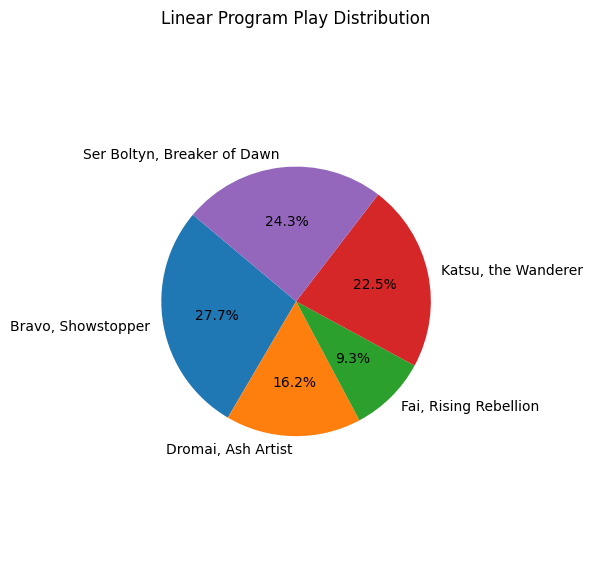

In [50]:
import matplotlib.pyplot as plt

# Plotting the pizza graph (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(non_zero_win_lp_df['lp_solution'], labels=non_zero_win_lp_df.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Linear Program Play Distribution')
plt.tight_layout()
plt.show()

In [18]:
import itertools
from collections import defaultdict

def generate_all_graphs(n):
    """Generates all valid directed graphs where each node has exactly n-1 connections."""
    players = list(range(n))
    all_matches = list(itertools.permutations(players, 2))  # All possible matches

    valid_graphs = []
    # Generate all possible results for each match
    for results in itertools.product([0, 1], repeat=len(all_matches)):
        graph = {i: [] for i in range(n)}
        for match, result in zip(all_matches, results):
            if result == 1:
                graph[match[0]].append(match[1])  # Player match[0] wins against match[1]
        
        # Check if every player has exactly n-1 matches
        if all(len(graph[i]) + len([1 for j in graph if i in graph[j]]) == n-1 for i in range(n)):
            valid_graphs.append(graph)
    
    return valid_graphs

def calculate_win_loss_records(graph):
    """Calculates win-loss records for each node in the graph."""
    records = {i: [0, 0] for i in graph}  # [wins, losses]
    for player, opponents in graph.items():
        for opponent in opponents:
            records[player][0] += 1  # Win for player
            records[opponent][1] += 1  # Loss for opponent
    return records

def summarize_records(graphs):
    """Summarizes records into a dictionary of frequencies."""
    summary = defaultdict(int)
    for graph in graphs:
        records = calculate_win_loss_records(graph)
        for rec in records.values():
            summary[tuple(rec)] += 1
    return summary

# Parameters
n = 8  # Number of players

# Generating all valid graphs (Note: computationally intensive and not feasible for large n)
valid_graphs = generate_all_graphs(n)
summary = summarize_records(valid_graphs)

# Print summary sorted by win-loss records
sorted_summary = sorted(summary.items(), key=lambda x: (-x[0][0], x[0][1]))
for record, count in sorted_summary:
    print(f"{count} records of {record[0]}-{record[1]}")


KeyboardInterrupt: 